# Data Summaries

## Introduction 

Before diving into formal analysis with a dataset, it is often helpful to perform some initial investigations of the data through exploratory data analysis (EDA) to get a better sense of what you will be working with. Basic summary statistics and visualizations are important components of EDA as they allow us to condense a large amount of information into a small set of numbers or graphics that can be easily interpreted.

In [8]:
movies = pd.read_csv('movies.csv')

# Print the first 5 rows 
display(movies.head())

# Print the summary statistics for all columns
display(movies.describe(include='all'))

,movie,production_budget,domestic_gross,worldwide_gross,mpaa_rating,genre
0,Evan Almighty,175000000.0,100289690.0,1.741313e+08,PG,Comedy
1,Waterworld,175000000.0,88246220.0,2.642462e+08,PG-13,Action
2,King Arthur: Legend of the Sword,175000000.0,39175066.0,1.399507e+08,PG-13,Adventure
3,47 Ronin,175000000.0,38362475.0,1.517168e+08,PG-13,Action
4,Jurassic World: Fallen Kingdom,170000000.0,416769345.0,1.304866e+09,PG-13,Action


,movie,production_budget,domestic_gross,worldwide_gross,mpaa_rating,genre
count,3401,3.401000e+03,3.401000e+03,3.401000e+03,3264,3401
unique,3400,NaN,NaN,NaN,4,5
top,Tau ming chong,NaN,NaN,NaN,R,Drama
freq,2,NaN,NaN,NaN,1514,1236
mean,NaN,3.328474e+07,4.542179e+07,9.411512e+07,NaN,NaN
std,NaN,3.489239e+07,5.882566e+07,1.409182e+08,NaN,NaN
min,NaN,2.500000e+05,0.000000e+00,0.000000e+00,NaN,NaN
25%,NaN,9.000000e+06,6.118683e+06,1.061881e+07,NaN,NaN
50%,NaN,2.000000e+07,2.553382e+07,4.015902e+07,NaN,NaN
75%,NaN,4.500000e+07,6.032379e+07,1.176152e+08,NaN,NaN


### Central Tendency for Quantitative Data

For quantitative variables, we often want to describe the central tendency, or the “typical” value of a variable. For example, what is the typical cost of rent in New York City?

In [10]:
# Save the mean to mean_budget
mean_budget = movies.production_budget.mean()
print(mean_budget)
# Save the median to med_budget
med_budget = movies.production_budget.median()
print(med_budget)
# Save the mode to mode_budget
mode_budget = movies.production_budget.mode()
print(mode_budget)
# Save the trimmed mean to trmean_budget
from scipy.stats import trim_mean
trmean_budget = trim_mean(movies.production_budget, proportiontocut=0.2)
print(trmean_budget)

33284743.23640106
20000000.0
0    20000000.0
Name: production_budget, dtype: float64


ModuleNotFoundError: No module named 'scipy'

### Spread for Quantitative Data

The spread of a quantitative variable describes the amount of variability. This is important because it provides context for measures of central tendency. For example, if there is a lot of variability in New York City rent prices, we can be less certain that the mean or median price is representative of what the typical rent is.

In [11]:
from scipy.stats import iqr

print(movies.head())
# Save the range to range_budget
range_budget = movies.production_budget.max() - movies.production_budget.min()
print(range_budget)
# Save the interquartile range to iqr_budget
iqr_budget = iqr(movies.production_budget)
print(iqr_budget)

# Save the variance to var_budget
var_budget = movies.production_budget.var()
print(var_budget)

# Save the standard deviation to std_budget
std_budget = movies.production_budget.std()
print(std_budget)

# Save the mean absolute deviation to mad_budget
mad_budget = movies.production_budget.mad()
print(mad_budget)

ModuleNotFoundError: No module named 'scipy'

### Visualising Quantitative Variables

While summary statistics are certainly helpful for exploring and quantifying a feature, we might find it hard to wrap our minds around a bunch of numbers. This is why data visualization is such a powerful element of EDA.

For quantitative variables, boxplots and histograms are two common visualizations. These plots are useful because they simultaneously communicate information about minimum and maximum values, central location, and spread. Histograms can additionally illuminate patterns that can impact an analysis (e.g., skew or multimodality).

Python’s seaborn library, built on top of matplotlib, offers the `boxplot()` and `histplot()` functions to easily plot data from a pandas DataFrame:

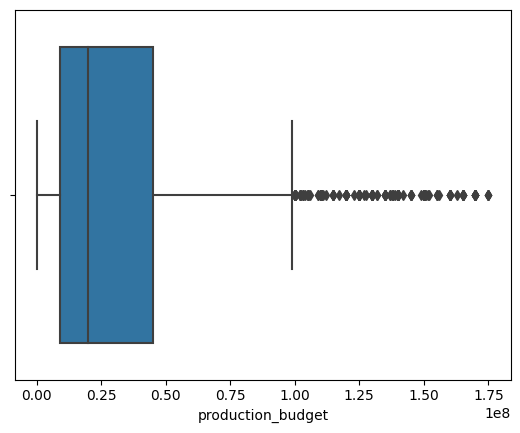

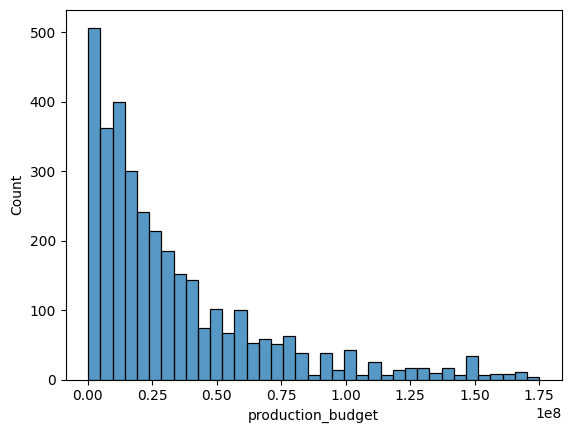

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

movies = pd.read_csv('movies.csv')

# Create a boxplot for movie budget 
sns.boxplot(x='production_budget', data=movies)
plt.show()
plt.close()

# Create a histogram for movie budget
sns.histplot(x='production_budget', data=movies)
plt.show()

### Value Counts for Categorical Data

When it comes to categorical variables, the measures of central tendency and spread that worked for describing numeric variables, like mean and standard deviation, generally becomes unsuitable when we’re dealing with discrete values. Unlike numbers, categorical values are not continuous and oftentimes do not have an intrinsic ordering.

Instead, a good way to summarize categorical variables is to generate a frequency table containing the count of each distinct value. For example, we may be interested to know how many of the New York City rental listings are from each borough. Related, we can also find which borough has the most listings.

The pandas library offers the `.value_counts()` method for generating the counts of all values in a DataFrame column:

In [3]:
movies = pd.read_csv('movies.csv')

# Save the counts to genre_counts
genre_counts = movies.genre.value_counts()
print(genre_counts)

Drama        1236
Comedy        813
Action        573
Adventure     481
Horror        298
Name: genre, dtype: int64


### Value Proportions for Categorical Data

A counts table is one approach for exploring categorical variables, but sometimes it is useful to also look at the proportion of values in each category. For example, knowing that there are 3,539 rental listings in Manhattan is hard to interpret without any context about the counts in the other categories. On the other hand, knowing that Manhattan listings make up 71% of all New York City listings tells us a lot more about the relative frequency of this category.

We can calculate the proportion for each category by dividing its count by the total number of values for that variable:

In [4]:
genre_props = movies.genre.value_counts(normalize=True)
print(genre_props)

Drama        0.363423
Comedy       0.239047
Action       0.168480
Adventure    0.141429
Horror       0.087621
Name: genre, dtype: float64


### Visualizing Categorical Variables

For categorical variables, bar charts and pie charts are common options for visualizing the count (or proportion) of values in each category. They can also convey the relative frequencies of each category.

Python’s seaborn library offers several functions that can create bar charts. The simplest for plotting the counts is `countplot()`:

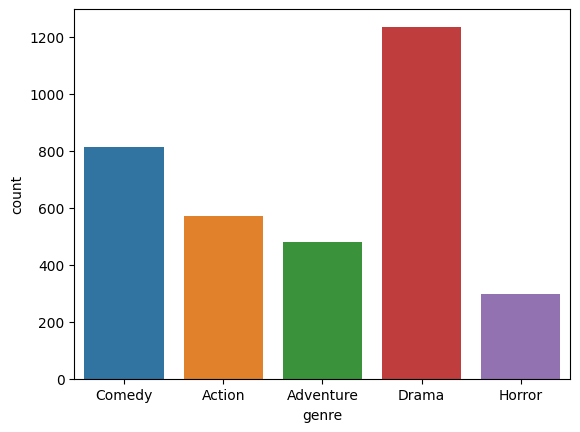

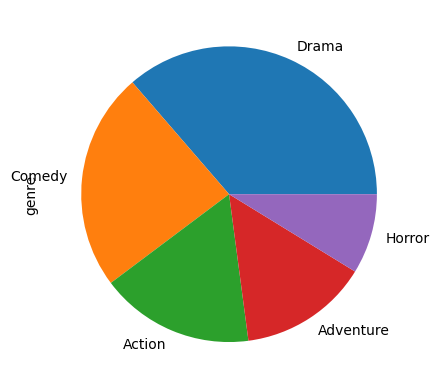

In [6]:
# Create a bar chart for movie genre
sns.countplot(x='genre', data=movies)
plt.show()
plt.close()

# Create a pie chart for movie genre
movies.genre.value_counts().plot(kind='pie')
plt.show()
plt.close()

## Review

In this lesson, you’ve learned about the common ways to summarize and visualize quantitative and categorical variables for the purpose of EDA.

 - We can use .describe(include='all') to quickly display common summary statistics for all columns in a pandas DataFrame.
 - For quantitative variables, measures of central tendency (e.g., mean, median, mode) and spread (e.g., range, variance, standard deviation) are good ways to summarize the data. Boxplots and histograms are often used for visualization.
 - For categorical variables, the relative frequencies of each category can be summarized using a table of counts or proportions. Bar charts and pie charts are often used for visualization.
 
Being able to use the appropriate metrics and visuals to explore the variables in your dataset can help you to draw insights from your data and prepare for more rigorous analysis and modeling down the road.